In [ ]:
import requests
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime, timedelta

In [ ]:

API_KEY = 'Fjw1hBBdbh0XIrbYIQkpFZcAez1vJhDe'
BASE_URL = 'https://financialmodelingprep.com/api/v3/historical-price-full'

In [ ]:
symbols = [ 
    # NASDAQ 100
    "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "FB", "TSLA", "NVDA", "PYPL", "ADBE",
    "NFLX", "CMCSA", "INTC", "PEP", "CSCO", "COST", "AVGO", "TXN", "AMGN", "QCOM",
    "CHTR", "TMUS", "GILD", "SBUX", "MDLZ", "ISRG", "INTU", "BKNG", "ADP", "FISV",
    "ATVI", "AMAT", "ADSK", "AMD", "ILMN", "MU", "ZM", "BIIB", "LRCX", "MELI", "KLAC",
    "DOCU", "EXC", "ORLY", "MNST", "EA", "NXPI", "CSX", "XEL", "SNPS", "CTSH", "REGN",
    "JD", "MAR", "ROST", "CTAS", "ALXN", "WBA", "ANSS", "DXCM", "PCAR", "FAST",
    "SGEN", "VRSK", "CDW", "CPRT", "TEAM", "PDD", "ASML", "NTES", "PAYX", "OKTA",
    "BIDU", "TCOM", "FOX", "FOXA", "KHC", "SIRI", "SWKS", "LULU", "MTCH", "MRVL",
    "IDXX", "WDAY", "ALGN", "TTWO", "VRTX",
]

In [ ]:

all_data = []
from_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')

for symbol in symbols:
    url = f'{BASE_URL}/{symbol}?from={from_date}&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()
    
    if 'historical' in data:
        for entry in data['historical']:
            record = {
                'symbol': symbol,
                'date': entry['date'],
                'open': entry['open'],
                'high': entry['high'],
                'low': entry['low'],
                'close': entry['close'],
                'volume': entry['volume']
            }
            all_data.append(record)
    print(f"Processed {symbol}")

df_final = pd.DataFrame(all_data)
table = pa.Table.from_pandas(df_final)
pq.write_table(table, 'nasdaq_daily-dontdothis.parquet')

## Plots

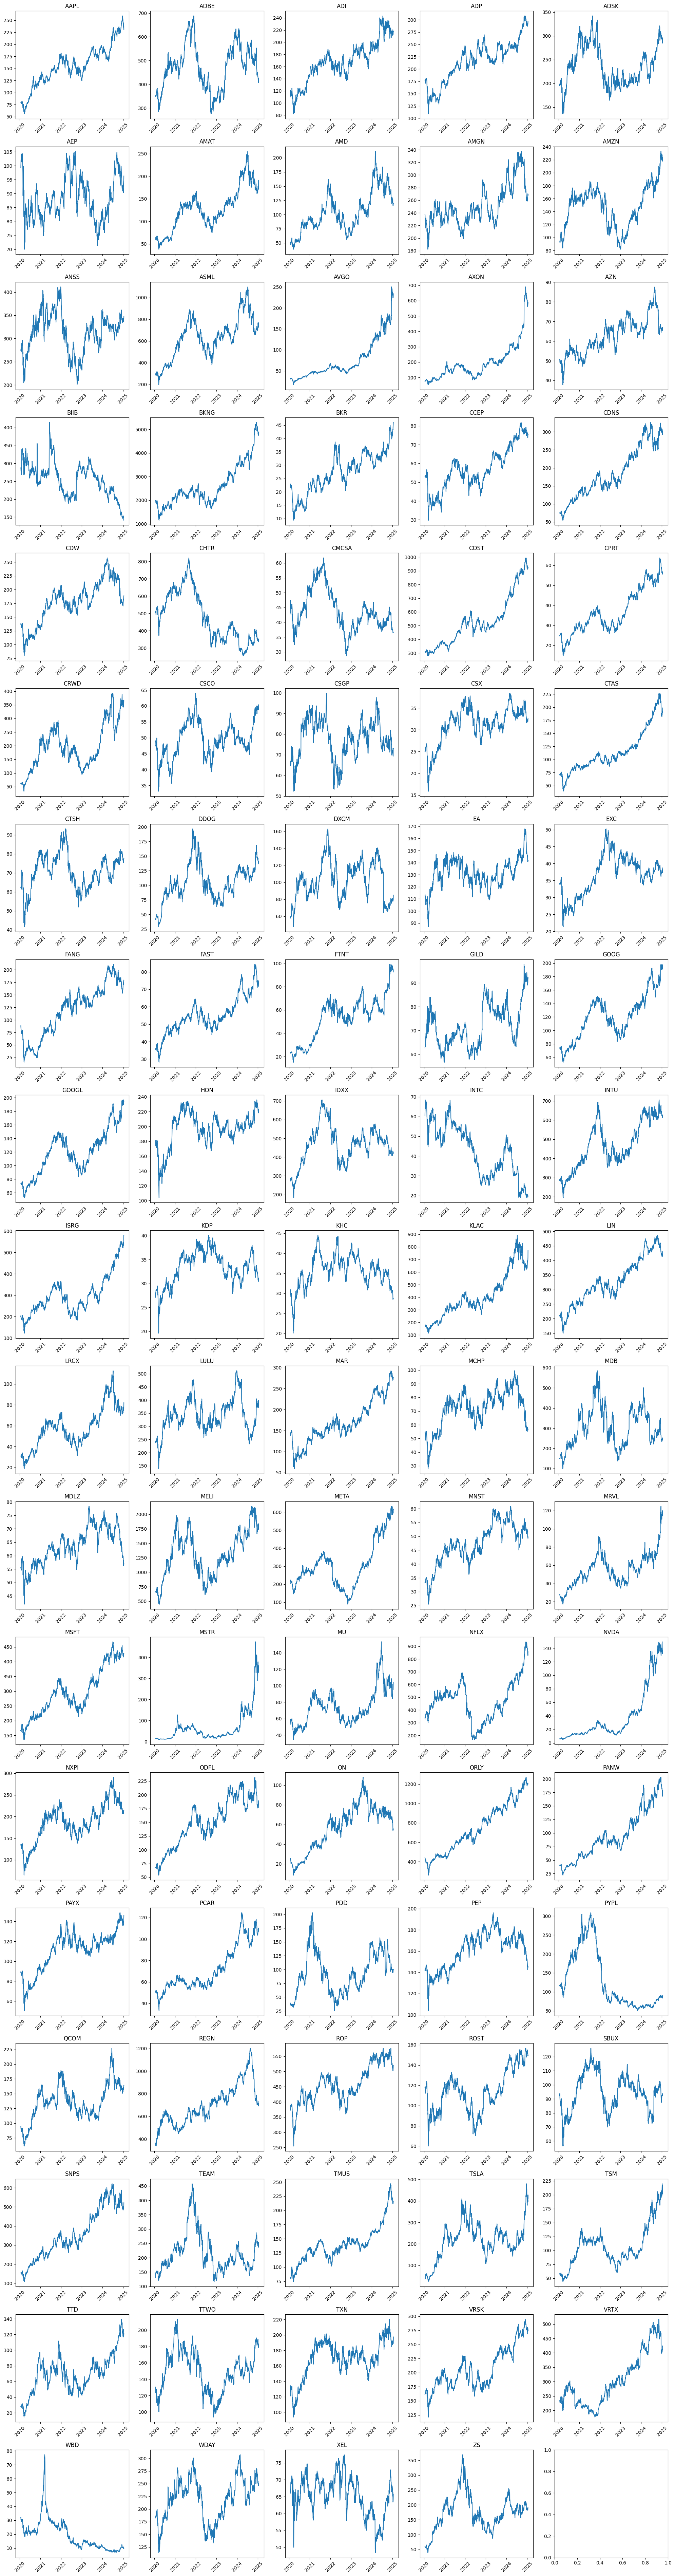

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_parquet('nasdaq_daily.parquet')

def plot_all_stocks(df):
    symbols = df['symbol'].unique()
    n = len(symbols)
    cols = 5
    rows = math.ceil(n/cols)
    
    fig, axs = plt.subplots(rows, cols, figsize=(20, 4*rows))
    axs = axs.ravel()
    
    for idx, symbol in enumerate(symbols):
        data = df[df['symbol'] == symbol]
        axs[idx].plot(pd.to_datetime(data['date']), data['close'])
        axs[idx].set_title(symbol)
        axs[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_all_stocks(df)

/var/folders/lm/w5v6vwl91955r0nc47_mqt88flhqcv/T/ipykernel_78968/2287601528.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


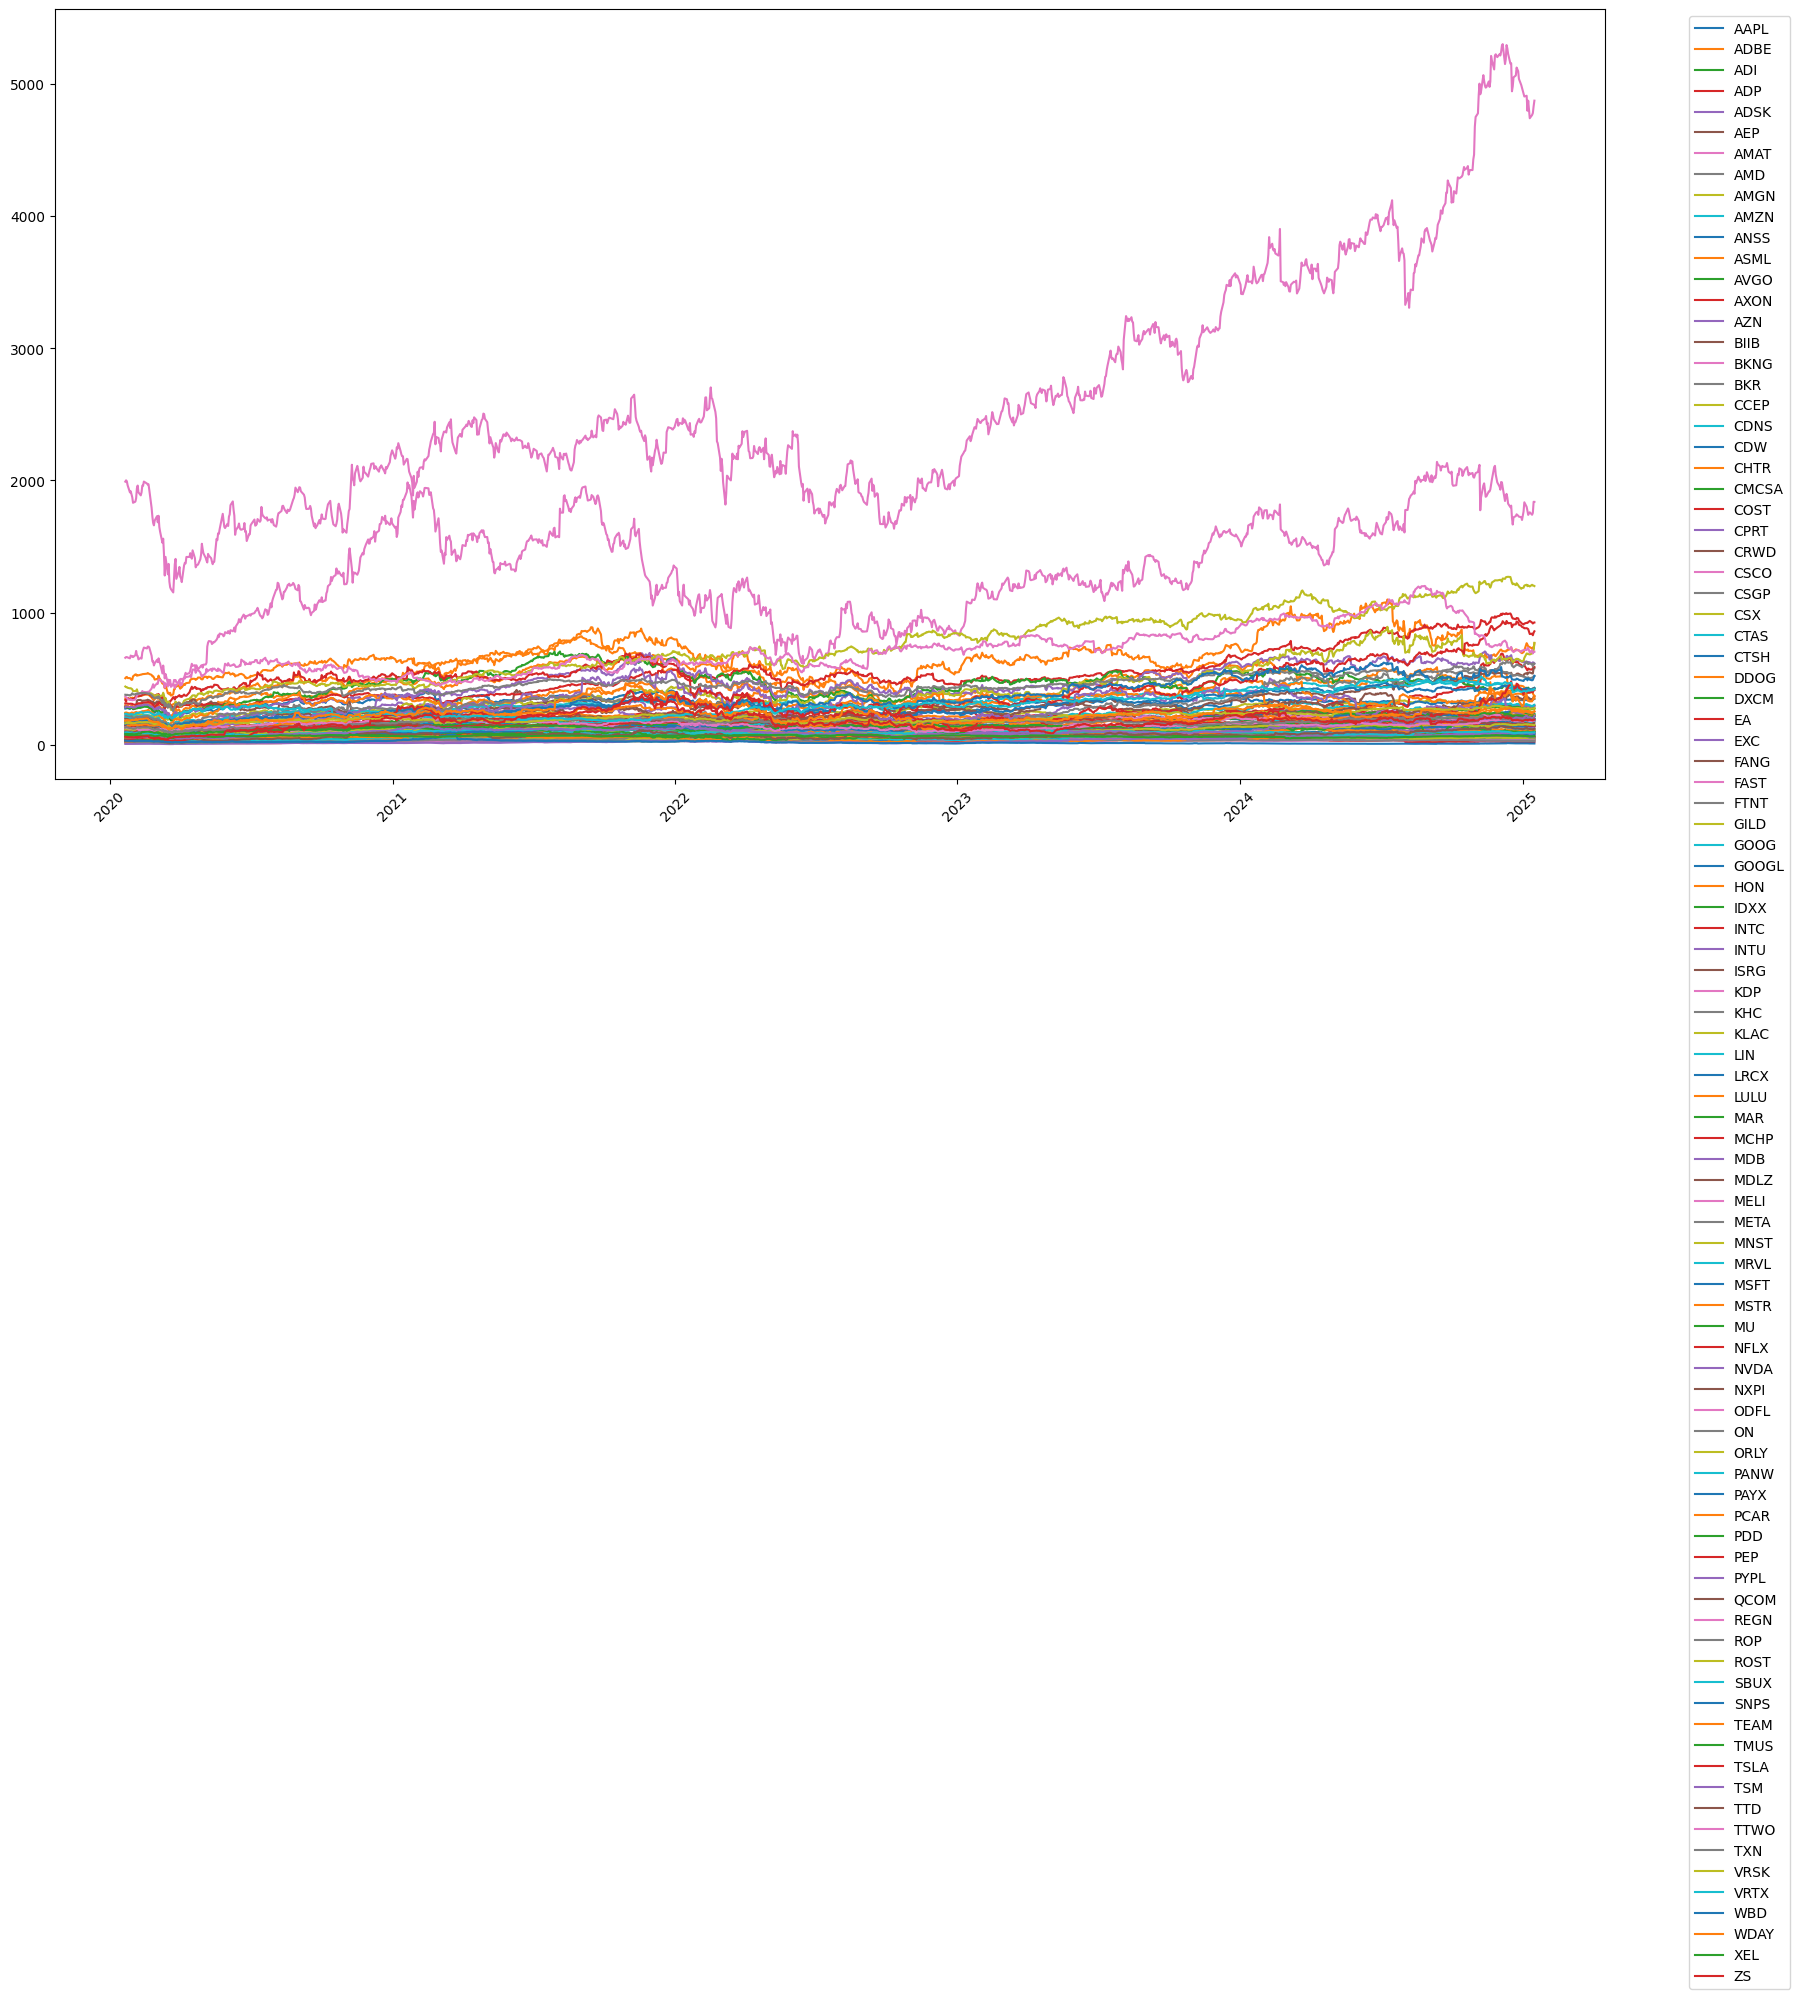

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet('nasdaq_daily.parquet')

def plot_all_stocks(df):
   plt.figure(figsize=(20, 10))
   
   for symbol in df['symbol'].unique():
       data = df[df['symbol'] == symbol]
       plt.plot(pd.to_datetime(data['date']), data['close'], label=symbol)
   
   plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
   plt.tick_params(axis='x', rotation=45)
   plt.tight_layout()
   plt.show()

plot_all_stocks(df)